**<center>* Assignment 13:  KNN  *</center>**

DATASCIENCE

name: GUVVALA SOMASEKHAR REDDY

mail: showmove5697@gmail.com

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#problem-1)

Prepare a model for glass classification using KNN

**Data Description:**

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

#Solution:

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass.csv


In [ ]:
glass=pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


##Basic and EDA

In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


*  All datatypes are correct.

In [ ]:
glass.shape

(214, 10)

In [ ]:
glass.duplicated().value_counts()

False    213
True       1
dtype: int64

*  Out of 214 records 1 record is duplicated.

In [ ]:
#duplicated record(s)
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
#droping duplicate record(s) in  data
glass=glass.drop_duplicates()
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

*  No null values in the given dataset.

In [ ]:
glass.Type.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

##Visualising datapoints

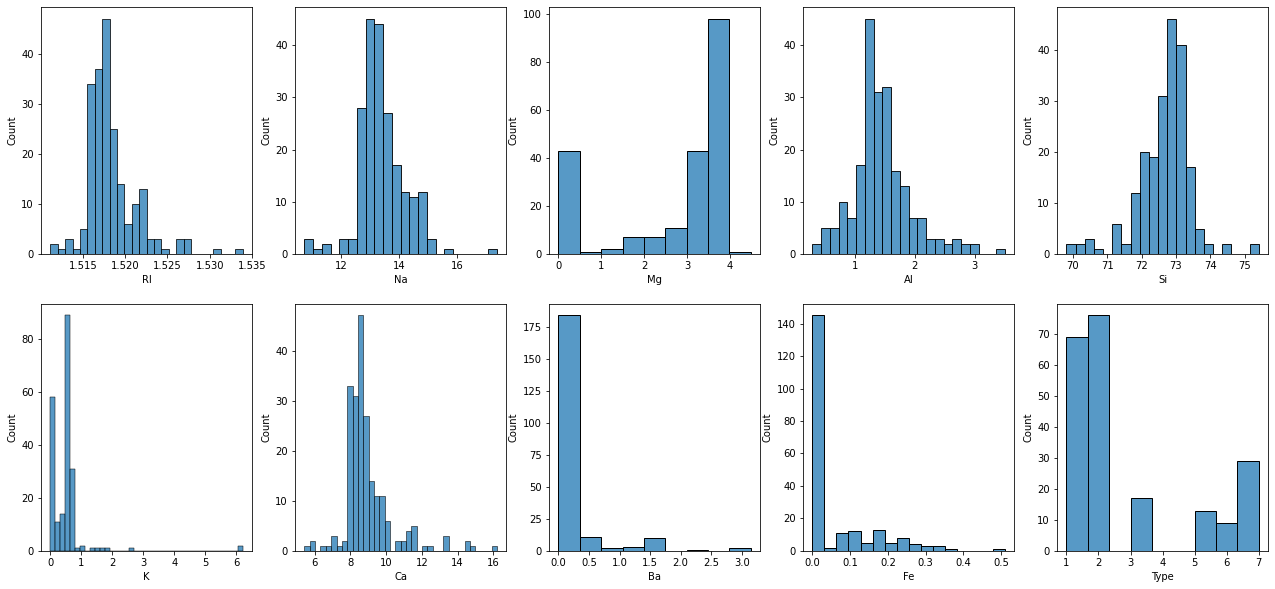

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(glass.columns, 1):
    plt.subplot(2,5,i)
    sns.histplot(glass[column])

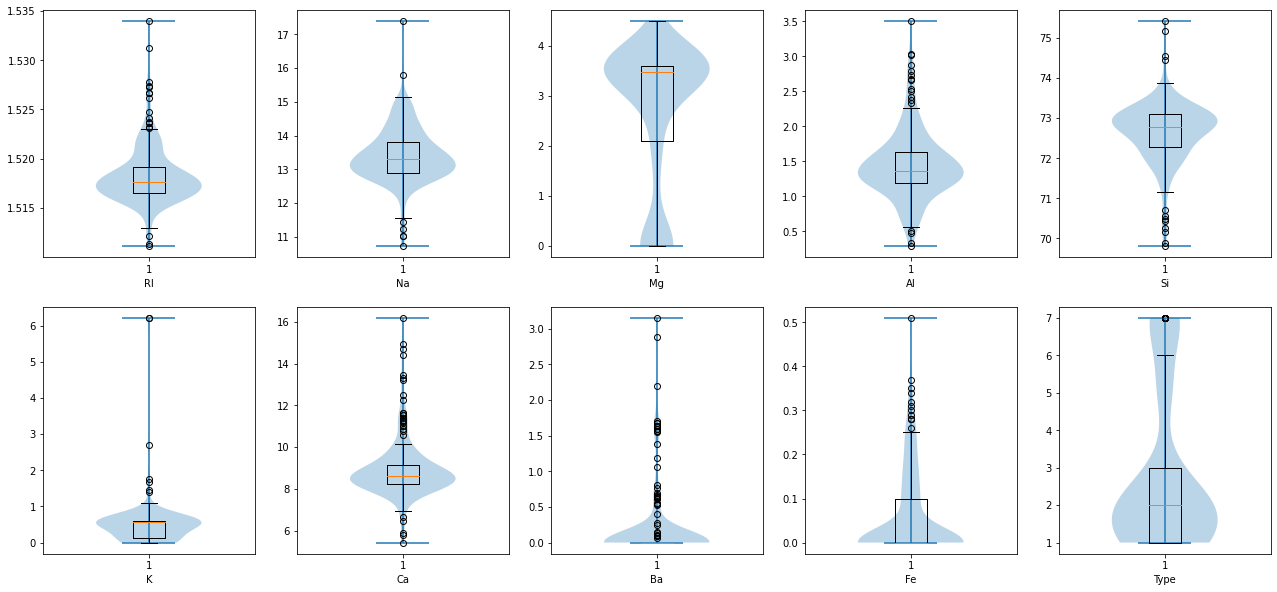

In [ ]:
#plotting boxplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(glass.columns, 1):
    plt.subplot(2,5,i)
    plt.violinplot(glass[column])
    plt.boxplot(glass[column])
    plt.xlabel(glass[column].name)

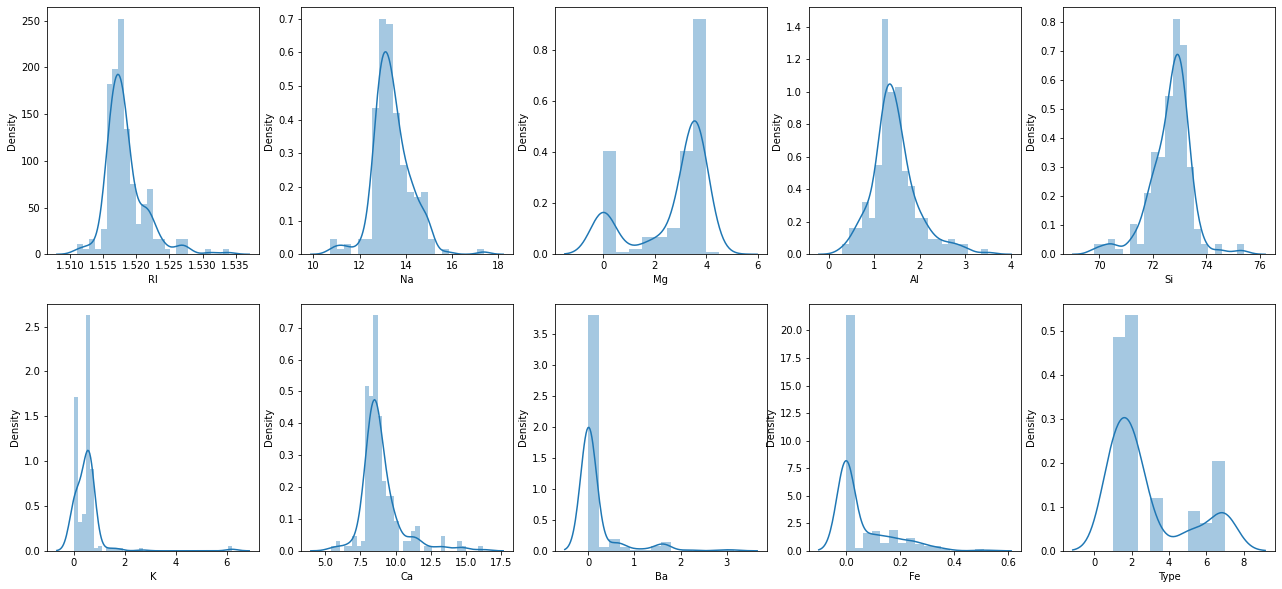

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(glass.columns, 1):
    plt.subplot(2,5,i)
    sns.distplot(glass[column])

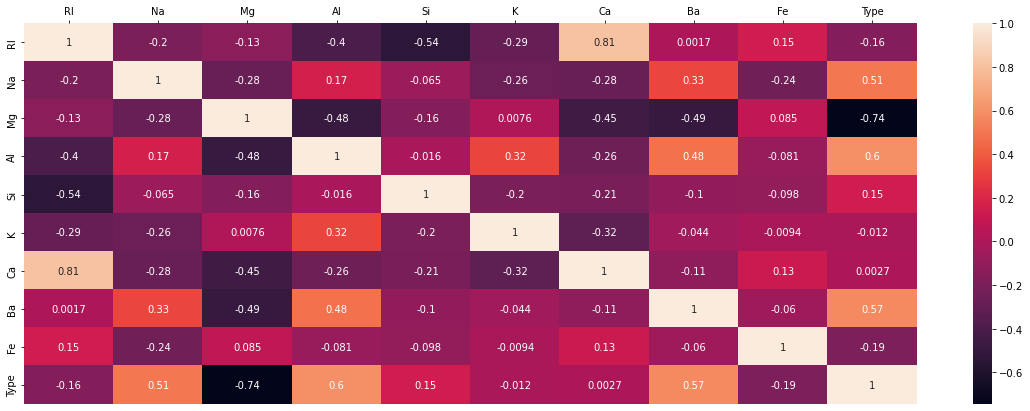

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(20,7))
ax = sns.heatmap(glass.corr(), annot=True)
ax.xaxis.tick_top()

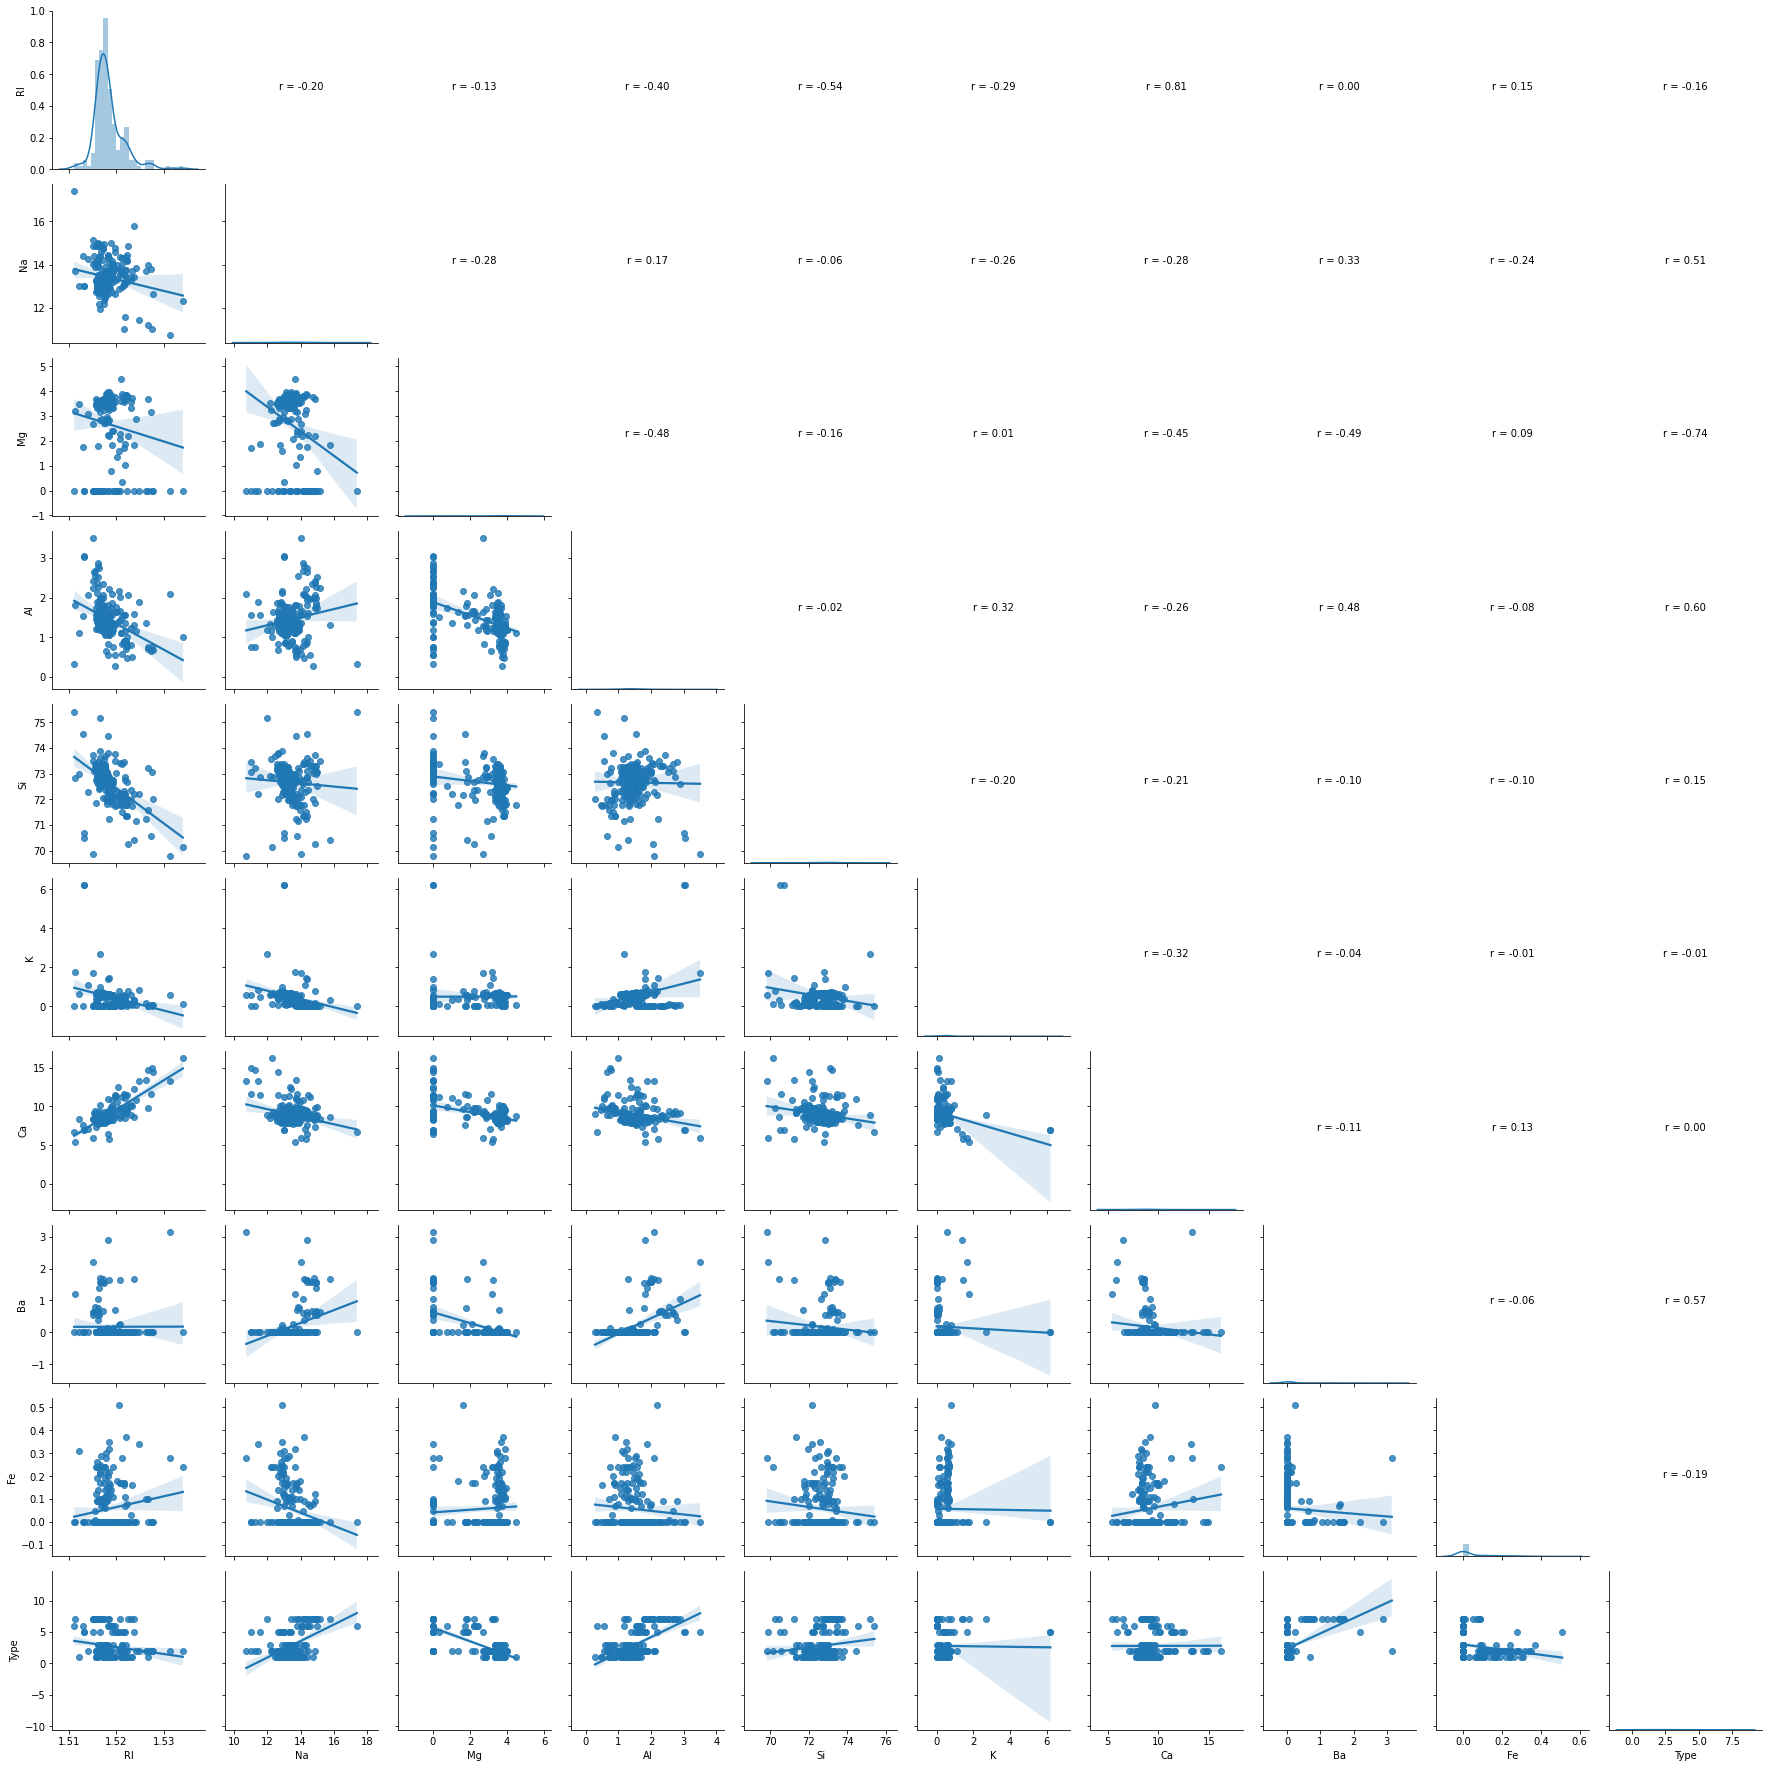

In [ ]:
# creating  pairGrid with correlation coefficients
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(glass)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

##KNN classifier

In [ ]:
x=glass.iloc[:,:9]
y=glass.iloc[:,9]
kfold=KFold(n_splits=9)
model=KNeighborsClassifier(n_neighbors=1)
results=cross_val_score(model,x,y,cv=kfold)
results

array([0.5       , 0.58333333, 0.66666667, 0.58333333, 0.54166667,
       0.41666667, 0.17391304, 0.26086957, 0.43478261])

In [ ]:
print(results.mean())

0.4623590982286634


###Grid search for Algorithm Tuning

In [ ]:
#Grid Search CV
from sklearn.model_selection import GridSearchCV
x=glass.iloc[:,:9]
y=glass.iloc[:,9]
n_neighbors=np.array(range(1,20))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.64828349944629
{'n_neighbors': 1}


### stepwise accuracy observation:




In [ ]:
# finding an optimal value of k for KNN
k_range=range(1,21) # k range trail
k_scores=[] # for listig
# loop for k
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k) 
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

0     0.638961
5     0.638961
2     0.633983
4     0.629221
19    0.625325
3     0.624459
6     0.619913
15    0.616017
18    0.615801
17    0.615584
16    0.611039
7     0.611039
11    0.606710
9     0.606494
13    0.606494
14    0.606494
12    0.601948
10    0.597186
1     0.596753
8     0.587662
dtype: float64

###stepwise acuuracy plotting

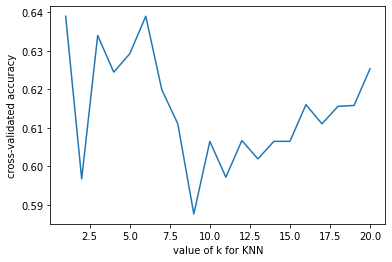

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

k_range=range(1,21) # k range trail
k_scores=[] # for listig

# loop for k
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k) 
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range,k_scores)

plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated accuracy')
plt.show()

###Train and Test method

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((149, 9), (149,), (64, 9), (64,))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from mlxtend.plotting import plot_confusion_matrix
def report(model):
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    print('\nMoldel train Accuracy score:',np.round(accuracy_score(y_train,model.predict(x_train))*100,2),'%')
    print('\nMoldel test Accuracy score:',np.round(accuracy_score(y_test,model.predict(x_test))*100,2),'%')
    print('\n classification_report:\n',classification_report(y_test,preds))
    print('\n confusion matrix:\n')
    cmt=confusion_matrix(y_test, preds)
    fig, ax = plot_confusion_matrix(conf_mat=cmt, cmap='PiYG')
    plt.show()


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 73.44 %

 classification_report:
               precision    recall  f1-score   support

           1       0.67      0.78      0.72        18
           2       0.85      0.71      0.77        24
           3       0.29      0.50      0.36         4
           5       0.67      1.00      0.80         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.73        64
   macro avg       0.74      0.73      0.72        64
weighted avg       0.78      0.73      0.75        64


 confusion matrix:



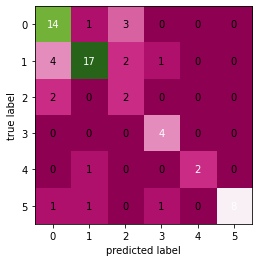

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
report(clf)

In [ ]:
glass_prediction=pd.DataFrame({"actual":y_test,"predicted":clf.predict(x_test)})
glass_prediction

,actual,predicted
9,1,1
198,7,7
67,1,1
192,7,7
118,2,2
...,...,...
68,1,1
5,1,2
136,2,1
57,1,1


#Conclusion:

*  The prediction is quite good for the type of glass 
*  k=1 outperforms all other tried k values in terms of accuracy.
*  KNN accuracy is around 64% with the gridsearch CV method.
*  KNN accuracy is around 73% with the train-test method.
*  Since the given data set is small, the accuracy is not great enough.


#Problem-2)

Implement a KNN model to classify the animals in to categorie

#Solution:

In [ ]:
#data loading
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo.csv


In [ ]:
zoo=pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


##Basic and EDA

In [ ]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


*  All datatypes are correct.

In [ ]:
zoo.shape

(101, 18)

In [ ]:
zoo.duplicated().value_counts()

False    101
dtype: int64



*   No duplication in the given dataset.



In [ ]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

*  No null values in the given dataset.

In [ ]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

##Visualising datapoints

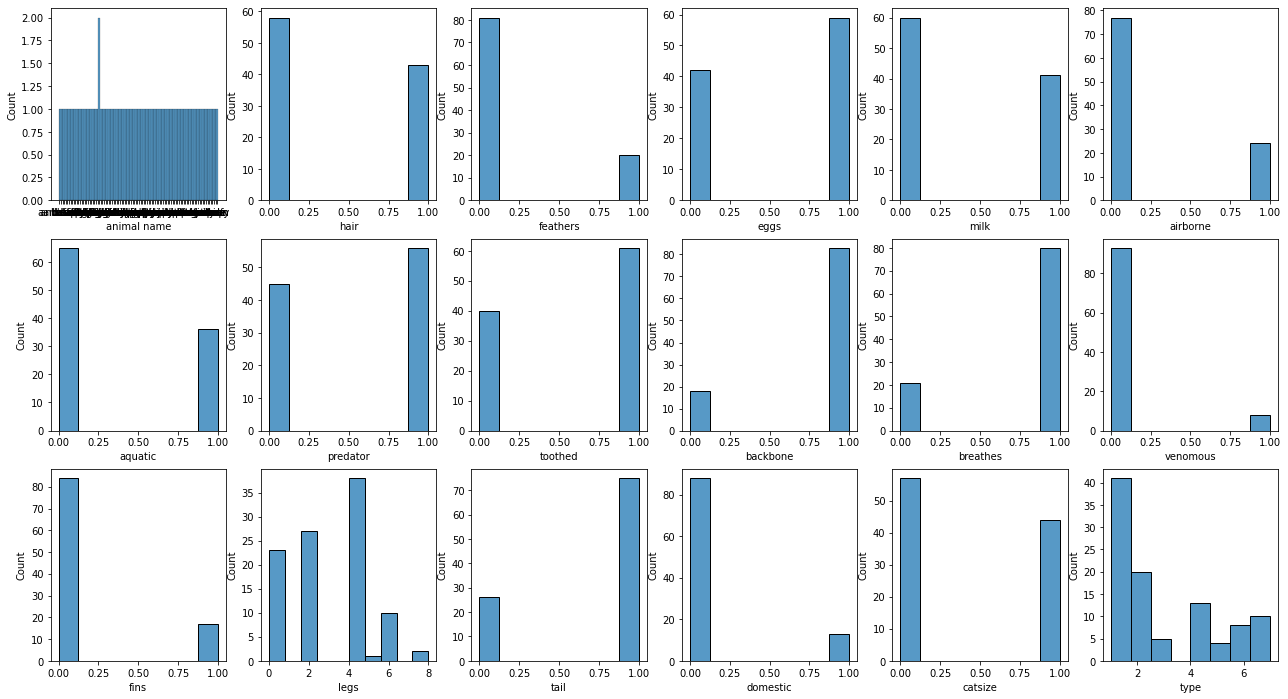

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,12))
for i, column in enumerate(zoo.columns, 1):
    plt.subplot(3,6,i)
    sns.histplot(zoo[column])

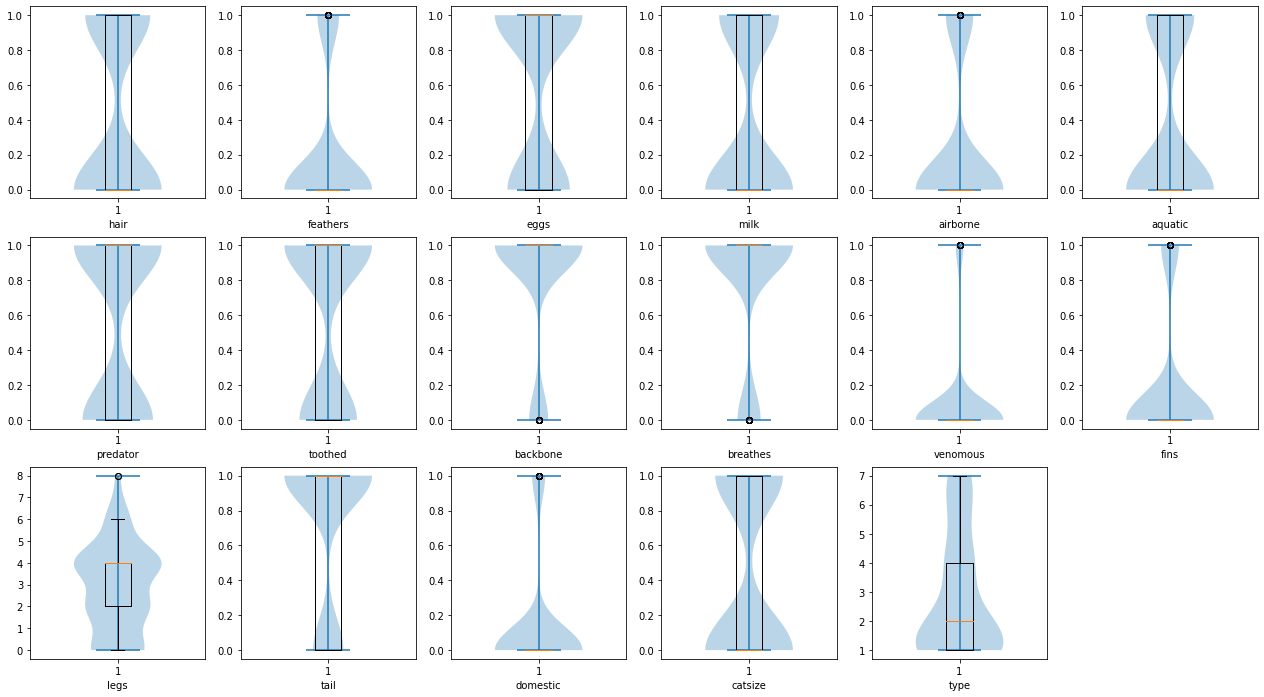

In [ ]:
#plotting boxplots to observe datapoints nature
plt.figure(figsize=(22,12))
for i, column in enumerate(zoo.drop('animal name',axis=1).columns, 1):
    plt.subplot(3,6,i)
    plt.violinplot(zoo[column])
    plt.boxplot(zoo[column])
    plt.xlabel(zoo[column].name)

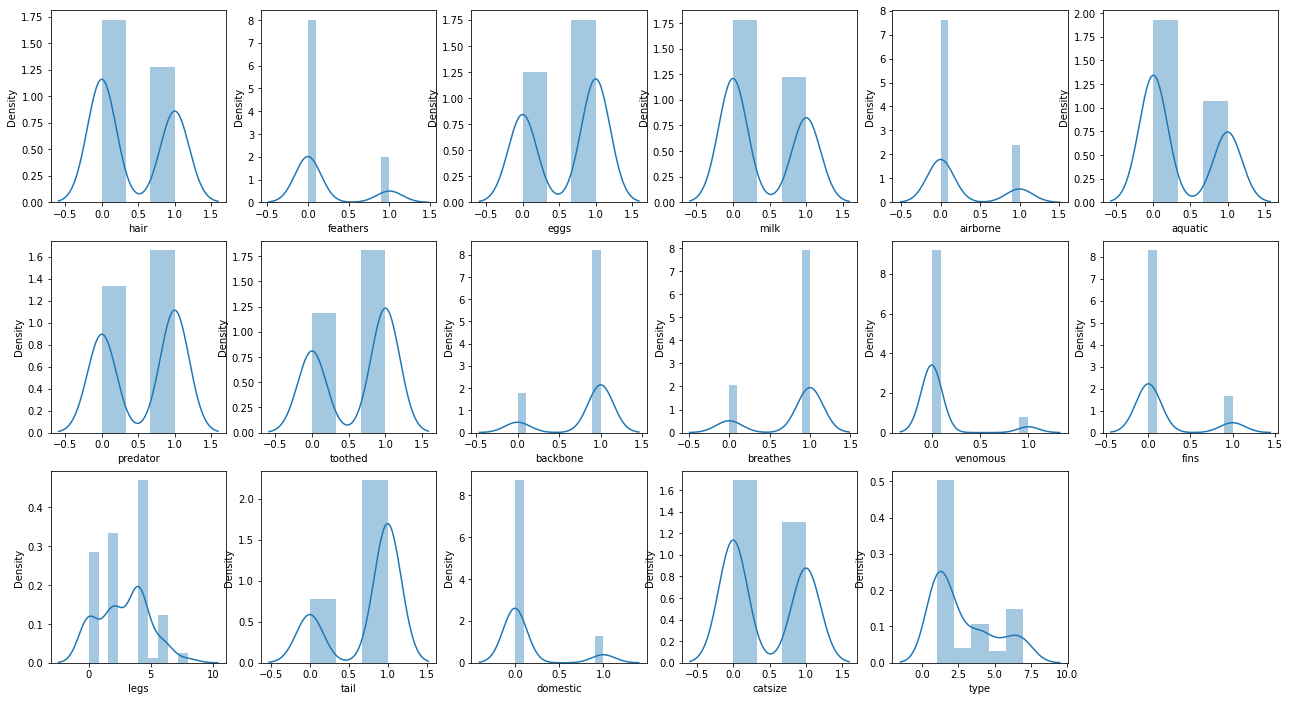

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,12))
for i, column in enumerate(zoo.drop('animal name',axis=1).columns, 1):
    plt.subplot(3,6,i)
    sns.distplot(zoo[column])

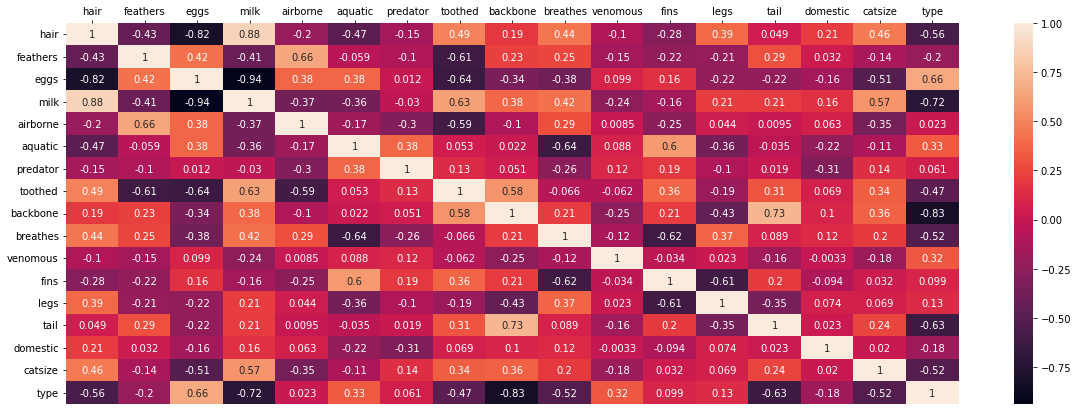

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(20,7))
ax = sns.heatmap(zoo.corr(), annot=True)
ax.xaxis.tick_top()

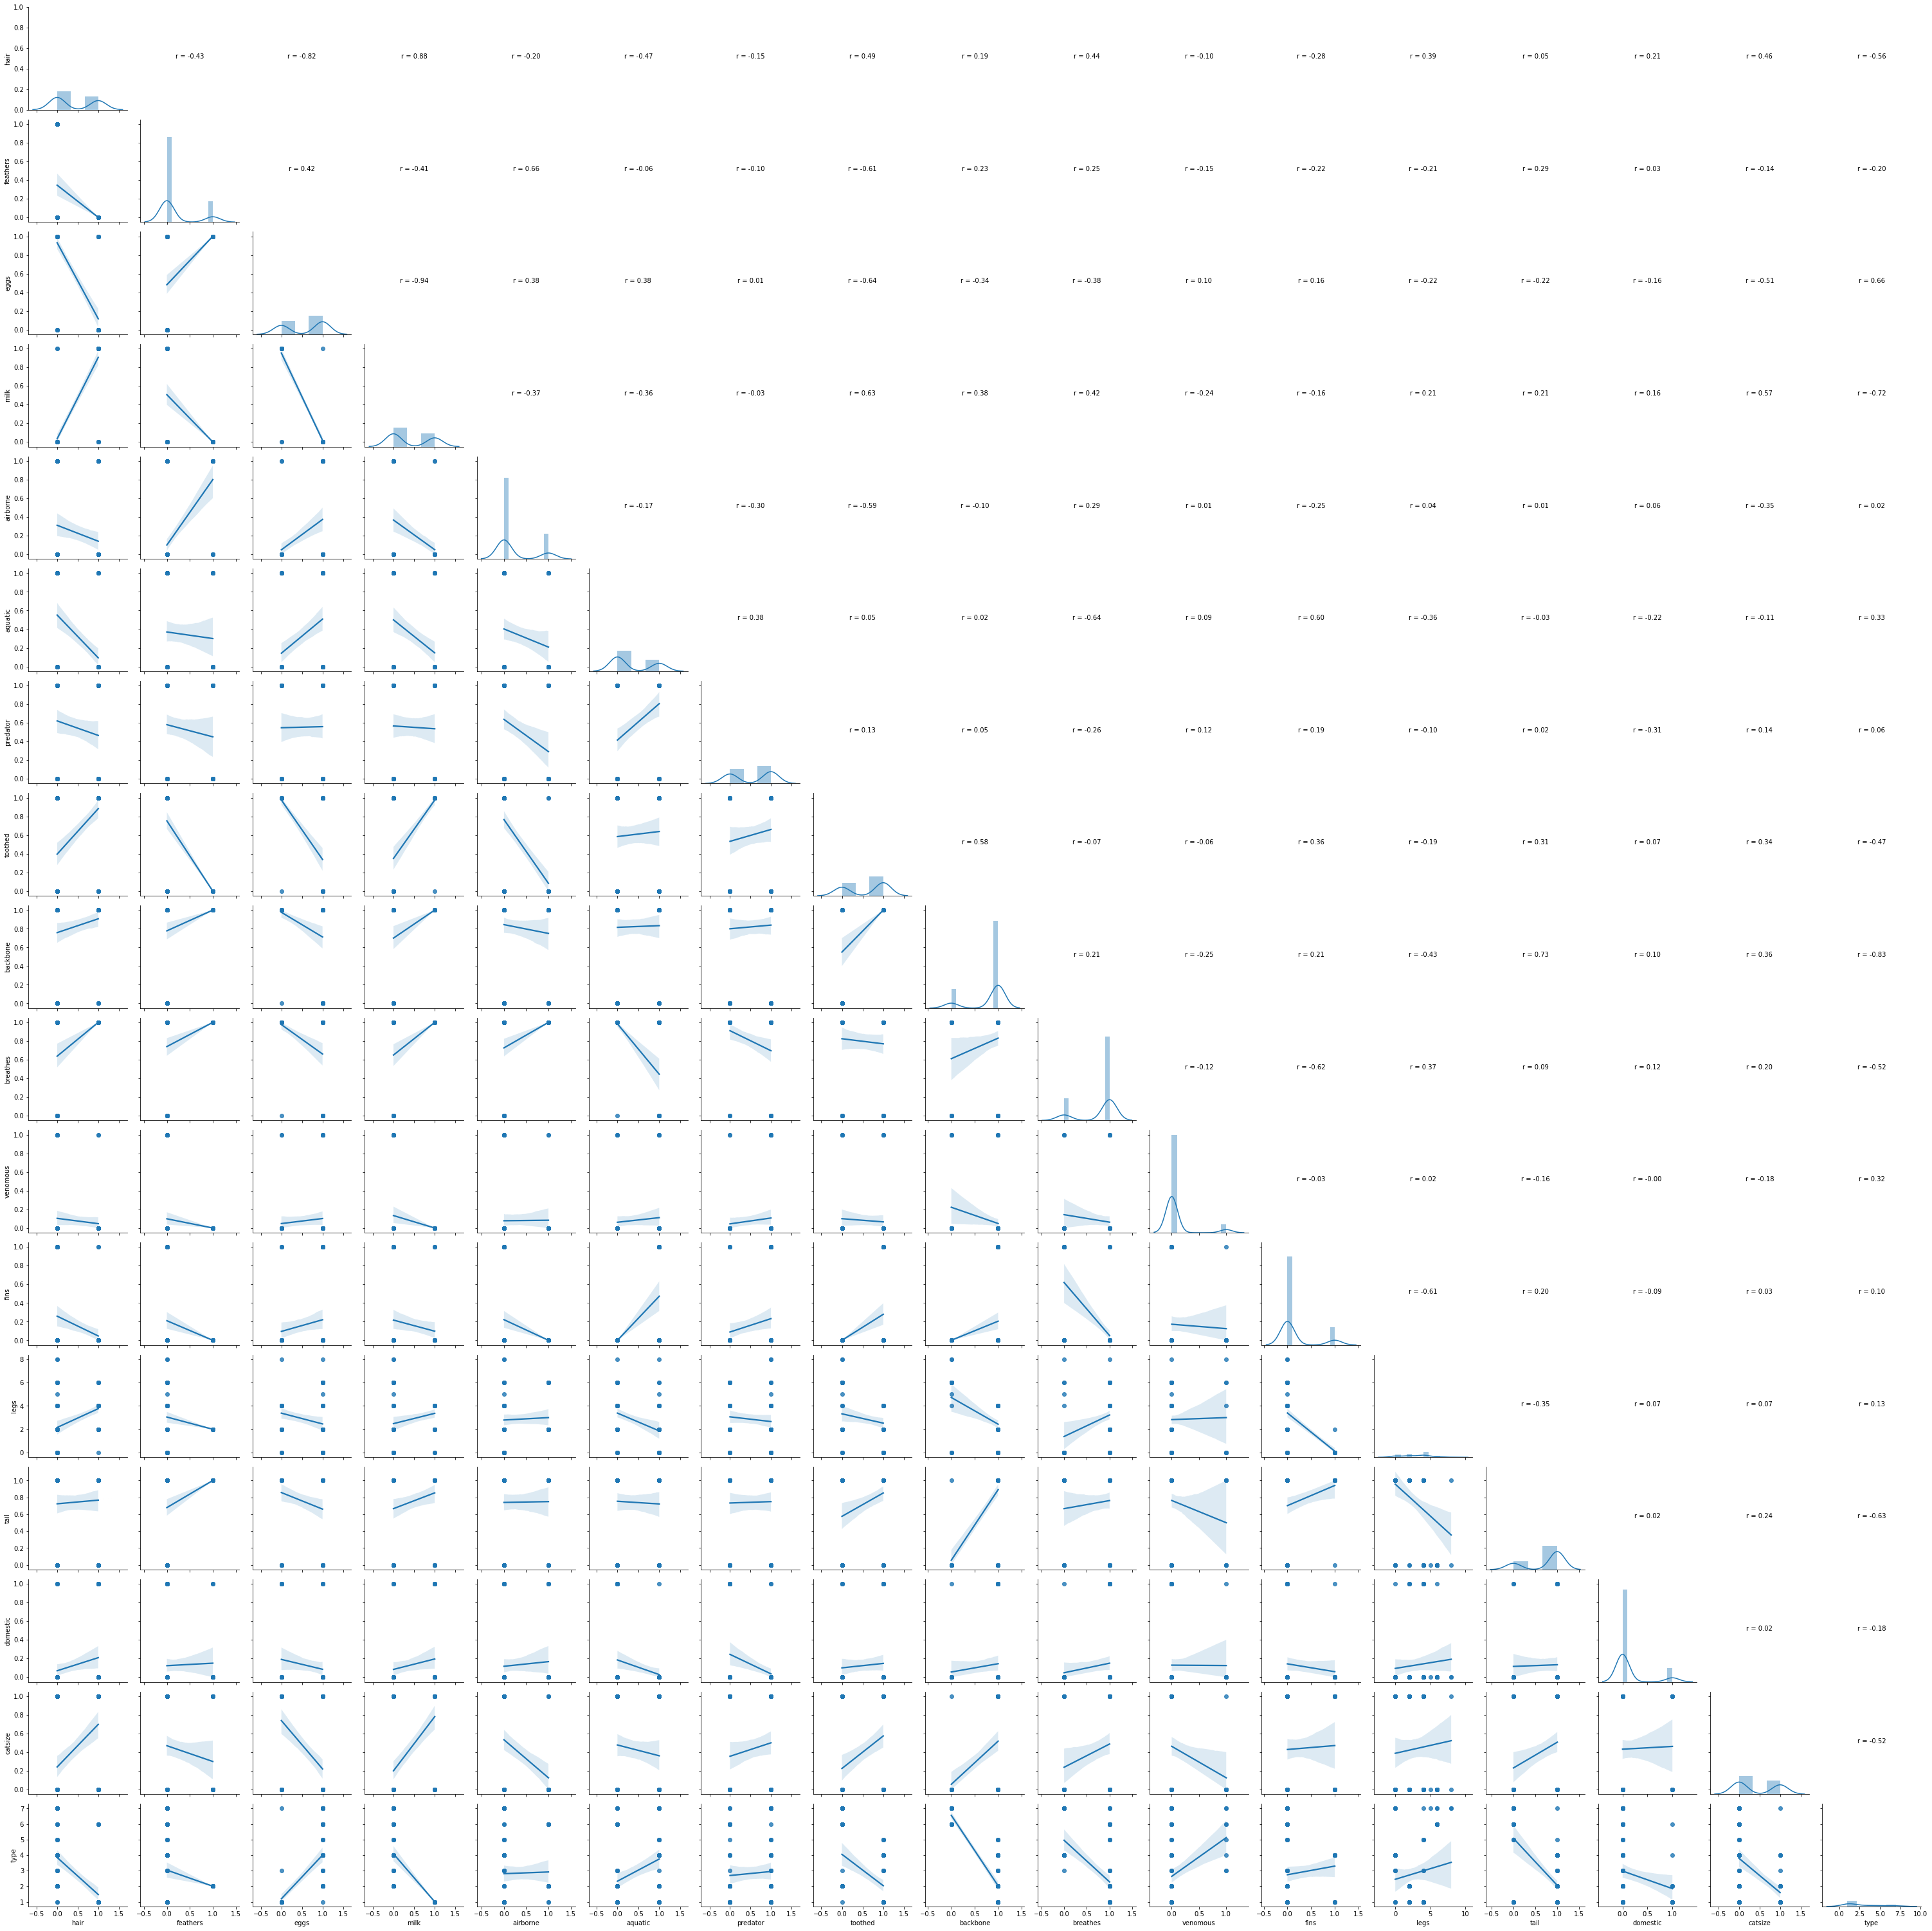

In [ ]:
# creating  pairGrid with correlation coefficients
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(zoo)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

##KNN classifier

In [ ]:
x=zoo.iloc[:,1:17]
y=zoo.iloc[:,17]
kfold=KFold(n_splits=9)
model=KNeighborsClassifier(n_neighbors=10)
results=cross_val_score(model,x,y,cv=kfold)
results

array([1.        , 0.66666667, 0.81818182, 1.        , 0.72727273,
       0.81818182, 0.63636364, 0.63636364, 0.72727273])

In [ ]:
print(results.mean())

0.7811447811447811


###Grid search for Algorithm Tuning

In [ ]:
#Grid Search CV
from sklearn.model_selection import GridSearchCV

In [ ]:
x=zoo.iloc[:,1:17]
y=zoo.iloc[:,17]
n_neighbors=np.array(range(1,20))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


###stepwise accuracy observation:

In [ ]:
# finding an optimal value of k for KNN
k_range=range(1,21) # k range trail
k_scores=[] # for listig

# loop for k
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k) 
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

0     0.980000
2     0.950000
1     0.940000
3     0.920000
4     0.880909
5     0.870909
6     0.841818
7     0.811818
14    0.781818
18    0.781818
17    0.781818
16    0.781818
15    0.781818
10    0.781818
13    0.781818
12    0.781818
11    0.781818
9     0.781818
8     0.781818
19    0.781818
dtype: float64

###stepwise accuracy plotting

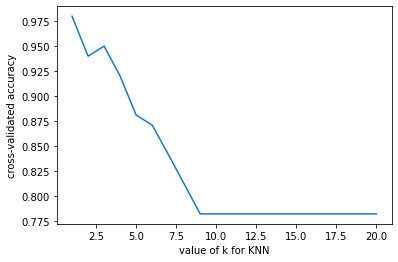

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

k_range=range(1,21) # k range trail
k_scores=[] # for listig

# loop for k
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k) 
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

# plot
plt.plot(k_range,k_scores)

plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated accuracy')
plt.show()

###Train and Test method

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((67, 16), (67,), (34, 16), (34,))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from mlxtend.plotting import plot_confusion_matrix
def report(model):
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    print('\nMoldel train Accuracy score:',np.round(accuracy_score(y_train,model.predict(x_train))*100,2),'%')
    print('\nMoldel test Accuracy score:',np.round(accuracy_score(y_test,model.predict(x_test))*100,2),'%')
    print('\n classification_report:\n',classification_report(y_test,preds))
    print('\n confusion matrix:\n')
    cmt=confusion_matrix(y_test, preds)
    fig, ax = plot_confusion_matrix(conf_mat=cmt, cmap='PiYG')
    plt.show()


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 97.06 %

 classification_report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         3
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3

    accuracy                           0.97        34
   macro avg       0.95      0.93      0.92        34
weighted avg       0.98      0.97      0.97        34


 confusion matrix:



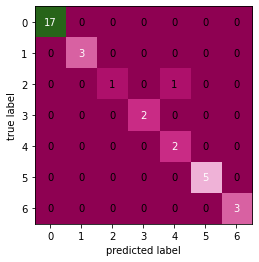

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
report(clf)

In [ ]:
zoo_prediction=pd.DataFrame({"actual":y_test,"predicted":clf.predict(x_test)})
zoo_prediction

,actual,predicted
84,1,1
55,1,1
66,1,1
67,1,1
45,1,1
39,6,6
22,1,1
44,1,1
10,1,1
0,1,1


#Conclusion:

*  The prediction is quite good for the type of animal.
*  k=1 outperforms all other tried k values in terms of accuracy.
*  KNN accuracy is around 97% with the gridsearch CV method.
*  KNN accuracy is around 97% with the train-test method.
*  Since the given data set is small, the accuracy is not great enough.




---

                                                                  THANK YOU



---



